In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import copy
import textalloc

# Parsing

In [2]:
with open("data/input23.txt") as f:
    data = f.read().rstrip("\n")

def get_grid(inlines, c2num):
    mat = np.array([[c for c in l] for l in inlines.split("\n")])
    matnum = np.zeros(mat.shape)
    for c in np.unique(mat):
        matnum[mat==c] = c2num[c]
    return matnum, mat

c2num = {".": 0, "#": 1, ">": 2, "v": 3, "O": 4}
num2c = {v: k for k, v in c2num.items()}

matnum, mat = get_grid(data, c2num)

# Part 1

In [3]:
def turn_right(curdir):
    if curdir==(0,1):
        return (1,0)
    if curdir==(0,-1):
        return (-1,0)
    if curdir==(1,0):
        return (0,-1)
    if curdir==(-1,0):
        return (0,1)

def turn_left(curdir):
    if curdir==(0,1):
        return (-1,0)
    if curdir==(0,-1):
        return (1,0)
    if curdir==(1,0):
        return (0,1)
    if curdir==(-1,0):
        return (0,-1)

def uphill(m, dir, pos):
    return (dir==(0,-1) and m[pos[0], pos[1]]==c2num[">"]) or (dir==(-1,0) and m[pos[0], pos[1]]==c2num["v"])

spos = (0,int(np.where(matnum[0,:]==c2num["."])[0]))
gpos = (matnum.shape[0]-1,int(np.where(matnum[-1,:]==c2num["."])[0]))

def recurse(matnum, accum, pos, dir):
    newmat = matnum.copy()
    leftdir = turn_left(dir)
    rightdir = turn_right(dir)
    fwpos = (pos[0]+dir[0],pos[1]+dir[1])
    leftpos = (pos[0]+leftdir[0],pos[1]+leftdir[1])
    rightpos = (pos[0]+rightdir[0],pos[1]+rightdir[1])
    while (int(newmat[fwpos[0], fwpos[1]]!=c2num["#"] and newmat[fwpos[0], fwpos[1]]!=c2num["O"]) + \
           int(newmat[leftpos[0], leftpos[1]]!=c2num["#"] and newmat[leftpos[0], leftpos[1]]!=c2num["O"]) + \
           int(newmat[rightpos[0], rightpos[1]]!=c2num["#"] and newmat[rightpos[0], rightpos[1]]!=c2num["O"]))<=1:
        if (int(newmat[fwpos[0], fwpos[1]]!=c2num["#"] and newmat[fwpos[0], fwpos[1]]!=c2num["O"]) + \
           int(newmat[leftpos[0], leftpos[1]]!=c2num["#"] and newmat[leftpos[0], leftpos[1]]!=c2num["O"]) + \
           int(newmat[rightpos[0], rightpos[1]]!=c2num["#"] and newmat[rightpos[0], rightpos[1]]!=c2num["O"]))==0:
            return 0
        accum += 1
        newmat[pos[0], pos[1]] = c2num["O"]
        if pos==gpos:
            return accum
        if newmat[fwpos]!=c2num["#"] and newmat[fwpos]!=c2num["O"]:
            pos = fwpos
        elif newmat[leftpos]!=c2num["#"] and newmat[leftpos]!=c2num["O"]:
            pos = leftpos
            dir = leftdir
        elif newmat[rightpos]!=c2num["#"] and newmat[rightpos]!=c2num["O"]:
            pos = rightpos
            dir = rightdir
        if pos==gpos:
            return accum
        leftdir = turn_left(dir)
        rightdir = turn_right(dir)
        fwpos = (pos[0]+dir[0],pos[1]+dir[1])
        leftpos = (pos[0]+leftdir[0],pos[1]+leftdir[1])
        rightpos = (pos[0]+rightdir[0],pos[1]+rightdir[1])
    newmat[pos[0], pos[1]] = c2num["O"]
    accum += 1
    alts = []
    for tpos, tdir in zip([fwpos, leftpos, rightpos], [dir, leftdir, rightdir]):
        if newmat[tpos]!=c2num["#"] and newmat[tpos]!=c2num["O"] and not uphill(matnum, tdir, tpos):
            alts.append(recurse(newmat, accum, tpos, tdir))
    return max(alts)
val = recurse(matnum, 0, spos, (1,0))
print(val)

2210


# Part 2

In [4]:
spos = (0,int(np.where(matnum[0,:]==c2num["."])[0]))
gpos = (matnum.shape[0]-1,int(np.where(matnum[-1,:]==c2num["."])[0]))

def recurse(matnum, accum, pos, dir, prevpos):
    newmat = matnum.copy()
    leftdir = turn_left(dir)
    rightdir = turn_right(dir)
    fwpos = (pos[0]+dir[0],pos[1]+dir[1])
    leftpos = (pos[0]+leftdir[0],pos[1]+leftdir[1])
    rightpos = (pos[0]+rightdir[0],pos[1]+rightdir[1])
    while (int(newmat[fwpos[0], fwpos[1]]!=c2num["#"] and newmat[fwpos[0], fwpos[1]]!=c2num["O"]) + \
           int(newmat[leftpos[0], leftpos[1]]!=c2num["#"] and newmat[leftpos[0], leftpos[1]]!=c2num["O"]) + \
           int(newmat[rightpos[0], rightpos[1]]!=c2num["#"] and newmat[rightpos[0], rightpos[1]]!=c2num["O"]))<=1:
        if (int(newmat[fwpos[0], fwpos[1]]!=c2num["#"] and newmat[fwpos[0], fwpos[1]]!=c2num["O"]) + \
           int(newmat[leftpos[0], leftpos[1]]!=c2num["#"] and newmat[leftpos[0], leftpos[1]]!=c2num["O"]) + \
           int(newmat[rightpos[0], rightpos[1]]!=c2num["#"] and newmat[rightpos[0], rightpos[1]]!=c2num["O"]))==0:
            return 0
        accum += 1
        newmat[pos[0], pos[1]] = c2num["O"]
        if pos==gpos:
            paths.append((prevpos,pos,accum+1))
            return accum
        if newmat[fwpos]!=c2num["#"] and newmat[fwpos]!=c2num["O"]:
            pos = fwpos
        elif newmat[leftpos]!=c2num["#"] and newmat[leftpos]!=c2num["O"]:
            pos = leftpos
            dir = leftdir
        elif newmat[rightpos]!=c2num["#"] and newmat[rightpos]!=c2num["O"]:
            pos = rightpos
            dir = rightdir
        if pos==gpos:
            paths.append((prevpos,pos,accum+1))
            return accum
        leftdir = turn_left(dir)
        rightdir = turn_right(dir)
        fwpos = (pos[0]+dir[0],pos[1]+dir[1])
        leftpos = (pos[0]+leftdir[0],pos[1]+leftdir[1])
        rightpos = (pos[0]+rightdir[0],pos[1]+rightdir[1])
    newmat[pos[0], pos[1]] = c2num["O"]
    if prevpos==(spos):
        paths.append((prevpos,pos,accum))
    else:
        paths.append((prevpos,pos,accum+1))
    accum += 1
    alts = []
    for tpos, tdir in zip([fwpos, leftpos, rightpos], [dir, leftdir, rightdir]):
        if newmat[tpos]!=c2num["#"] and newmat[tpos]!=c2num["O"] and not uphill(matnum, tdir, tpos):
            alts.append(recurse(newmat, 0, tpos, tdir, pos))
    return max(alts)

paths = []
_ = recurse(matnum, 0, spos, (1,0), spos)

x,y = [],[]
ind2node = {}
iter = 0
for p1,p2,acc in paths:
    if p1 not in ind2node.values():
        ind2node[iter] = p1
        iter += 1
    if p2 not in ind2node.values():
        ind2node[iter] = p2
        iter += 1
    x.append(p1[0])
    x.append(p2[0])
    y.append(p1[1])
    y.append(p2[1])
node2ind = {v:k for k,v in ind2node.items()}
distmat = np.zeros((len(node2ind), len(node2ind)))
for p1,p2,acc in paths:
    distmat[node2ind[p1],node2ind[p2]] = acc
    distmat[node2ind[p2],node2ind[p1]] = acc
graph = {i:{} for i in range(len(node2ind))}
for i in range(len(node2ind)):
    for j in range(len(node2ind)):
        if distmat[i,j] != 0:
            graph[i][j] = distmat[i,j]
            graph[j][i] = distmat[i,j]

class Node:
    def __init__(self, cost, ind, history):
        self.ind = ind
        self.cost = cost
        self.history = history

    def __lt__(self, other):
        return self.cost < other.cost

besthist = []

def recurse(node2ind, ind2node, graph, node, maxval, starttime):
    global besthist
    if time.time()-starttime>0.5:
        return 0
    if ind2node[node.ind]==gpos:
        if node.cost>maxval[0]:
            besthist = node.history
            maxval[0] = node.cost
        return node.cost
    accs = [0]
    neighs = []
    for newind, cost in graph[node.ind].items():
        neighs.append((newind, cost))
    neighs = sorted(neighs, key=lambda s: -s[1])
    for newind, cost in neighs:
        if newind not in node.history:
            accs.append(recurse(node2ind, ind2node, graph, Node(node.cost+cost, newind, node.history + [newind]), maxval, starttime))
    return max(accs)

maxval = [0]
starttime = time.time()
_ = recurse(node2ind, ind2node, graph, Node(0, node2ind[spos], []), maxval, starttime)
print(int(maxval[0]))

6522


# Overkill

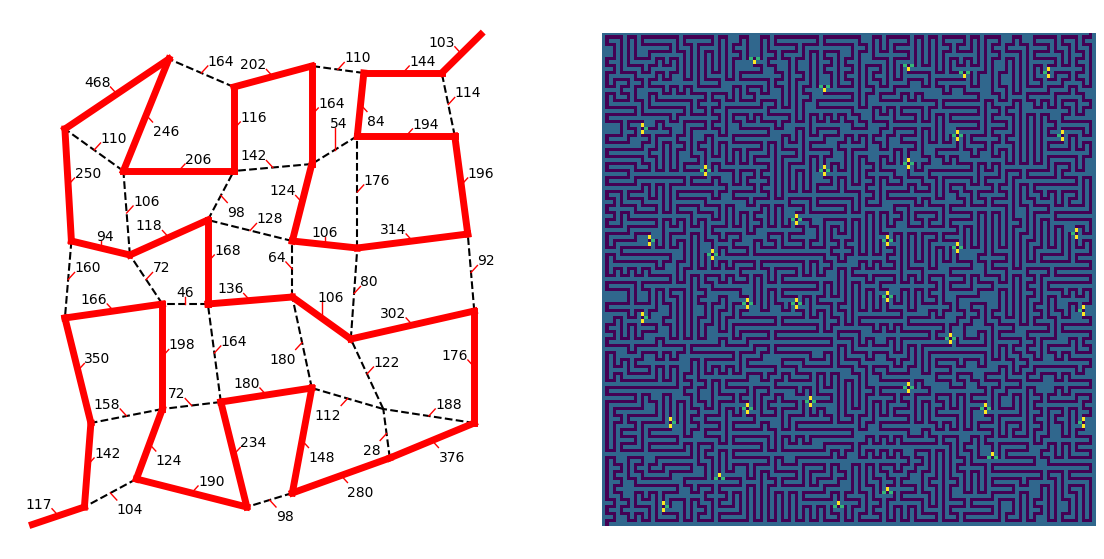

In [5]:
fig,ax = plt.subplots(1,2,figsize=(14,7))
xt, yt, tt, xl, yl = [], [], [], [], []
for i in range(len(node2ind)):
    for j in range(len(node2ind)):
        if distmat[i,j] != 0 and i>j:
            n1 = ind2node[i]
            n2 = ind2node[j]
            ax[0].plot([n1[1], n2[1]], [n1[0], n2[0]], "k--", zorder=1)
            xl.append([n1[1], n2[1]])
            yl.append([n1[0], n2[0]])
            xt.append((n1[1]+n2[1])/2)
            yt.append((n1[0]+n2[0])/2)
            tt.append(int(distmat[i,j]))
ax[0].plot([spos[1], ind2node[besthist[0]][1]], [spos[0], ind2node[besthist[0]][0]], c="r", zorder=10, linewidth=5)
for i in range(len(besthist)-1):
    p1 = ind2node[besthist[i]]
    p2 = ind2node[besthist[i+1]]
    ax[0].plot([p1[1], p2[1]], [p1[0], p2[0]], c="r", zorder=10, linewidth=5)
textalloc.allocate_text(fig,ax[0],xt,yt,tt,x_lines=xl,y_lines=yl)
ax[0].axis('off')
ax[1].imshow(np.flip(matnum,axis=0))
ax[1].axis('off')
plt.show()